<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Homework 3: Practical - ML Models for Tabular Datasets <br>
<font color=696880 size=4>
    Niloufar Razani 
    
    
____

### Full Name : kasra malihi
### Student Number : 99105742
___

<font face="Times New Roman" size=4><div dir=ltr>
In this homework we are going to implement Adaboost algorithm from scratch. Please read this chapter's <a href="https://github.com/asharifiz/Introduction_to_Machine_Learning/tree/main/Jupyter_Notebooks/Chapter_04_Tabular_Data_Models"><font face="Roboto">notebook</font></a> and then complete the #TODO sections. <br>
We will use the heart_disease.csv dataset, which you can see more details about in this <a href="https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download&select=heart.csv"><font face="Roboto">Link</font></a>.
___

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data Prepration (10 points) 
1.   Load Dataset
2.   Separate target feaure
3.   Change class labels to 1 and -1
4.   Do train-test split

In [43]:
df = pd.read_csv('heart_disease.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [44]:
y = df["target"].copy()
X = df.drop("target", axis=1)
y[y == 0] = -1
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

### Adaboost Algorithm Implementation (40 points)

In [70]:
from sklearn.tree import DecisionTreeClassifier as DTC
import math

def calculate_error(y, y_pred, w):
    #TODO : Calculate the weighted error of a weak classifier.
    wrong_preds_total_weight = 0
    for i in range(len(y)):
        if y[i] != y_pred[i]:
            wrong_preds_total_weight += w[i]
    return (wrong_preds_total_weight/sum(w))
    

def calculate_alpha(error):
    #TODO : Calculate the weight of a weak classifier.
    return np.log((1-error)/error) / 2
    

def update_weights(w, alpha, y, y_pred):
    #TODO : Update weights after a boosting iteration.
    for i in range(len(y)):
        if y[i] != y_pred[i]:
            w[i] = w[i] * math.exp(alpha)
        else:
            w[i] = w[i] * math.exp(-alpha)
    w = np.asarray(w) / sum(w)

    
class AdaBoost:
    
    def __init__(self):
        self.alphas = []
        self.G_M = []
        self.training_errors = []

    def fit(self, X, y, M = 100):
        
        self.alphas = [] 
        self.training_errors = []
        self.M = M
        
        w = []
        for m in range(0, M):
            
            # Set weights
            if m == 0:
                w = [1/len(y)] * len(y)
                 
            else:
                update_weights(w, self.alphas[m - 1], y, y_pred)
               
            
            # 1. Fit weak classifier and predict labels(using predict method) and Save it to list of weak classifiers.
            dtc = DTC(max_depth=1)
            dtc = dtc.fit(X, y, w)
            self.G_M.append(dtc)
            y_pred = dtc.predict(X)
            

            # 2. Calculate error of this weak classifier and save it to list of training_errors.
            #TODO
            error = calculate_error(y, y_pred, w)
            self.training_errors.append(error)

            # 3. Calculate alpha of this weak classifier and save it to list of alphas.
            alpha = calculate_alpha(error)
            self.alphas.append(alpha)



    def predict(self, X):

        weak_preds = pd.DataFrame(index = range(len(X)), columns = range(self.M)) 

        for m in range(self.M):
            y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
            weak_preds.iloc[:,m] = y_pred_m

        y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)

        return y_pred

### Training and Evaluation (20 points)

In [76]:
#TODO : Fit model
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, recall_score, f1_score, precision_score
ab = AdaBoost()
y_train = list(y_train)
ab.fit(X_train, y_train, 100)
#TODO : Predict on test data
y_pred = ab.predict(X_test)
#TODO : Print evaluation metrics (Accurcy, Precission, Recall and f-score)
print('accuracy = ', accuracy_score(y_test, y_pred))
print('recall = ', recall_score(y_test, y_pred, average='binary'))
print('precision = ', precision_score(y_test, y_pred, average='binary'))
print('f score = ', f1_score(y_test, y_pred, average='binary'))

accuracy =  0.8466076696165191
recall =  0.8511904761904762
precision =  0.8411764705882353
f score =  0.8461538461538461


/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

accuracy =  0.8731563421828908
recall =  0.8511904761904762
precision =  0.8881987577639752
f score =  0.8693009118541033


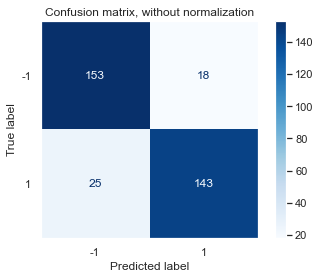

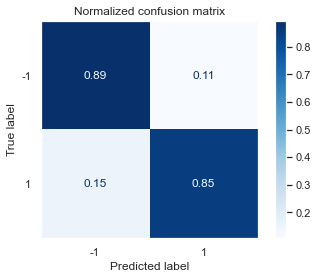

In [84]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
titles_options = [("Confusion matrix, without normalization", None), ("Normalized confusion matrix", "true"),]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(clf,X_test,y_test,cmap=plt.cm.Blues,normalize=normalize,)
    disp.ax_.set_title(title)
    
print('accuracy = ', accuracy_score(y_test, y_pred))
print('recall = ', recall_score(y_test, y_pred, average='binary'))
print('precision = ', precision_score(y_test, y_pred, average='binary'))
print('f score = ', f1_score(y_test, y_pred, average='binary'))

### Early Stopping (15 points)

In [79]:
from sklearn.metrics import mean_squared_error
result={}
for count_of_estimators in range(1, 100):
    ab = AdaBoost()
    ab.fit(X_train, y_train, count_of_estimators)
    y_pred = ab.predict(X_test)
    val_error = mean_squared_error(y_test, y_pred)
    result[count_of_estimators]=val_error

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/6p/6tyvsv4x2qn0xq237jlvyjwr0000gn/T/ipykernel_40330/1219942176.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain t

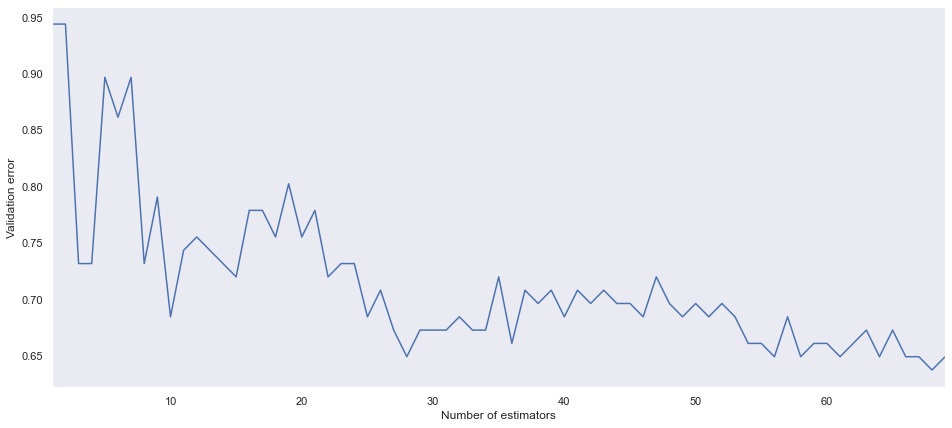

In [78]:
plt.figure(figsize=(16, 7))
sns.set(style='dark',)
ax = sns.lineplot(x=list(result.keys()), y=list(result.values()))
plt.xlabel("Number of estimators")
plt.ylabel("Validation error")
ax.set_xlim([1, max(list(result.keys()))])
plt.show()

In [80]:
#TODO : Print the best number for estimators and minimum value for validation error.
print("The best number for estimators is: "+ str(list(result.values()).index(min(list(result.values())))+1))
print("The minimum value for validation error is: "+ str(min(list(result.values()))))

The best number for estimators is: 85
The minimum value for validation error is: 0.5899705014749262


### Weighted Error (10 points)

<function matplotlib.pyplot.show(close=None, block=None)>

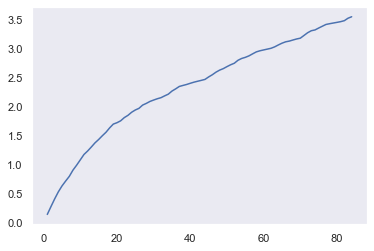

In [82]:
#TODO : Plot weighted training error versus number of estimators figure using training_errors attribute in Adaboost class.
Weighted_error = []
for count_of_estimators in range(1, 85):
    ab = AdaBoost()
    ab.fit(X_train, y_train, count_of_estimators)
    alphas = ab.alphas
    training_errors = ab.training_errors
    Weighted_error.append(np.dot(alphas, training_errors))
plt.plot(range(1, 85), Weighted_error)
plt.show

### Question : Why does the weighted error tend to increase as the number of estimators increase? (5points)
<font face="Times New Roman" size=4><div dir=ltr>
because as the algorithm goes on the weight for missclasified points grows so the next stump pays more attention to them, this results in more weighted errors per iteration